<a href="https://colab.research.google.com/github/nmodem2k/Machine-Learning-E2E/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.mainroad=data.mainroad.map({'yes':1,'no':0})
data.guestroom=data.guestroom.map({'yes':1,'no':0})
data.basement=data.basement.map({'yes':1,'no':0})
data.hotwaterheating=data.hotwaterheating.map({'yes':1,'no':0})
data.airconditioning=data.airconditioning.map({'yes':1,'no':0})
data.prefarea=data.prefarea.map({'yes':1,'no':0})

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
dummies=pd.get_dummies(data.furnishingstatus,drop_first=True)

In [7]:
data=pd.concat([data,dummies],axis=1)

In [8]:
data.drop('furnishingstatus',axis=1,inplace=True)

In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [10]:
data=(data-data.mean())/data.std()

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [12]:
X=data['area']
Y=data.price

In [13]:
import matplotlib.pyplot as plt


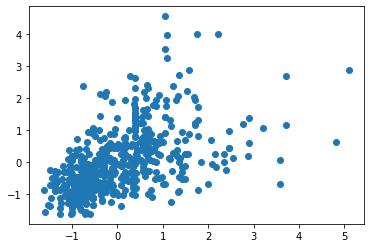

In [14]:
plt.scatter(X,Y)

In [15]:
def gradient(X,y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
  N=float(len(y))
  gd_df=pd.DataFrame(columns=['m_current','c_current','cost'])
  for i in range(iters):
    y_current=m_current * X +c_current
    loss=sum([data**2 for data in (y-y_current)])/N
    m_gradient=-(2/N)*sum(X*(y-y_current))
    c_gradient=-(2/N)*sum(y-y_current)
    m_current=m_current- (learning_rate*m_gradient)
    c_current=c_current-(learning_rate*c_gradient)
    gd_df.loc[i]=[m_current,c_current,loss]
  return gd_df

In [16]:
gradient(X,Y)

,m_current,c_current,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
...,...,...,...
995,0.535997,2.630312e-16,0.711399
996,0.535997,2.560398e-16,0.711399
997,0.535997,2.557220e-16,0.711399
998,0.535997,2.522997e-16,0.711399


In [17]:
plt.plot()

NameError: ignored